# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL //
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city //
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_response['coord']['lat']
        city_lng = weather_response['coord']['lon']
        city_max_temp = weather_response['main']['temp_max']
        city_humidity = weather_response['main']['humidity']
        city_clouds = weather_response['clouds']['all']
        city_wind = weather_response['wind']['speed']
        city_country = weather_response['name']
        city_date = weather_response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        time.sleep(1)
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | vardo
Processing Record 3 of Set 1 | puerto madryn
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | hobyo
Processing Record 9 of Set 1 | avera
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | abu samrah
Processing Record 12 of Set 1 | tandil
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | cambe
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | yerkoy
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | ouallam
Processing Record 21 of Set 1 | saint-pierre
Processing Record 22 of Set 1 | samarai
Processing Record 23 of Se

Processing Record 39 of Set 4 | grand forks
Processing Record 40 of Set 4 | berlevag
Processing Record 41 of Set 4 | ola
Processing Record 42 of Set 4 | seymchan
Processing Record 43 of Set 4 | vanimo
Processing Record 44 of Set 4 | barraute
Processing Record 45 of Set 4 | aksarka
Processing Record 46 of Set 4 | rorvik
Processing Record 47 of Set 4 | pascagoula
Processing Record 48 of Set 4 | yerbogachen
Processing Record 49 of Set 4 | carnarvon
Processing Record 0 of Set 5 | velyka pysarivka
Processing Record 1 of Set 5 | abaza
Processing Record 2 of Set 5 | sorong
Processing Record 3 of Set 5 | kitimat
Processing Record 4 of Set 5 | clinton
Processing Record 5 of Set 5 | soyo
Processing Record 6 of Set 5 | marawi
Processing Record 7 of Set 5 | bathsheba
Processing Record 8 of Set 5 | tilichiki
Processing Record 9 of Set 5 | ligayan
Processing Record 10 of Set 5 | malakal
Processing Record 11 of Set 5 | edd
Processing Record 12 of Set 5 | castro
Processing Record 13 of Set 5 | jumla
P

Processing Record 30 of Set 8 | cacapava do sul
Processing Record 31 of Set 8 | banugao
Processing Record 32 of Set 8 | merano
Processing Record 33 of Set 8 | sioux lookout
Processing Record 34 of Set 8 | manbij
Processing Record 35 of Set 8 | chabahar
Processing Record 36 of Set 8 | tarpon springs
Processing Record 37 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 38 of Set 8 | ixtapa
Processing Record 39 of Set 8 | tiznit
Processing Record 40 of Set 8 | kropotkin
Processing Record 41 of Set 8 | naze
Processing Record 42 of Set 8 | prachuap khiri khan
Processing Record 43 of Set 8 | gamba
Processing Record 44 of Set 8 | den helder
Processing Record 45 of Set 8 | langham
Processing Record 46 of Set 8 | shaowu
Processing Record 47 of Set 8 | mikhaylovka
Processing Record 48 of Set 8 | cap malheureux
Processing Record 49 of Set 8 | zitacuaro
Processing Record 0 of Set 9 | poronaysk
Processing Record 1 of Set 9 | dalby
Processing Record 2 of Set 9 | gympie
Processing Re

Processing Record 17 of Set 12 | saravena
Processing Record 18 of Set 12 | tessalit
Processing Record 19 of Set 12 | sadri
Processing Record 20 of Set 12 | minot
Processing Record 21 of Set 12 | rumoi
Processing Record 22 of Set 12 | vyazemskiy
Processing Record 23 of Set 12 | thinadhoo
Processing Record 24 of Set 12 | sabha
Processing Record 25 of Set 12 | kibala
Processing Record 26 of Set 12 | hofn
Processing Record 27 of Set 12 | chishtian mandi
Processing Record 28 of Set 12 | verkhnyaya maksakovka
Processing Record 29 of Set 12 | awjilah
Processing Record 30 of Set 12 | yakovlevskoye
Processing Record 31 of Set 12 | kushima
Processing Record 32 of Set 12 | taixing
Processing Record 33 of Set 12 | rio gallegos
Processing Record 34 of Set 12 | dubuque
Processing Record 35 of Set 12 | merauke
Processing Record 36 of Set 12 | khandyga
Processing Record 37 of Set 12 | castanas
Processing Record 38 of Set 12 | pinega
Processing Record 39 of Set 12 | yanam
Processing Record 40 of Set 12

In [36]:
city_data

[{'City': 'kodiak',
  'Lat': 57.79,
  'Lng': -152.4072,
  'Max Temp': 2.73,
  'Humidity': 48,
  'Cloudiness': 0,
  'Wind Speed': 5.14,
  'Country': 'Saint Paul Harbor',
  'Date': 1669954033},
 {'City': 'vardo',
  'Lat': 70.3705,
  'Lng': 31.1107,
  'Max Temp': 0.99,
  'Humidity': 93,
  'Cloudiness': 100,
  'Wind Speed': 1.03,
  'Country': 'Vardø',
  'Date': 1669954034},
 {'City': 'puerto madryn',
  'Lat': -42.7692,
  'Lng': -65.0385,
  'Max Temp': 22.53,
  'Humidity': 26,
  'Cloudiness': 58,
  'Wind Speed': 4.45,
  'Country': 'Puerto Madryn',
  'Date': 1669953772},
 {'City': 'pisco',
  'Lat': -13.7,
  'Lng': -76.2167,
  'Max Temp': 19.03,
  'Humidity': 82,
  'Cloudiness': 0,
  'Wind Speed': 1.54,
  'Country': 'Pisco',
  'Date': 1669954036},
 {'City': 'nikolskoye',
  'Lat': 59.7035,
  'Lng': 30.7861,
  'Max Temp': -10.11,
  'Humidity': 85,
  'Cloudiness': 97,
  'Wind Speed': 1.64,
  'Country': 'Nikolskoye',
  'Date': 1669954038},
 {'City': 'avarua',
  'Lat': -21.2078,
  'Lng': -159.775,

In [35]:
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
# weather_response = requests.get(city_url).json()
# pprint(weather_response)

{'base': 'stations',
 'clouds': {'all': 63},
 'cod': 200,
 'coord': {'lat': 8.0333, 'lon': -2.8},
 'dt': 1669954899,
 'id': 2291136,
 'main': {'feels_like': 22.4,
          'grnd_level': 970,
          'humidity': 91,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 21.79,
          'temp_max': 21.79,
          'temp_min': 21.79},
 'name': 'Bondoukou',
 'sys': {'country': 'CI', 'sunrise': 1669961410, 'sunset': 1670003480},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 238, 'gust': 4.79, 'speed': 1.72}}


In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,2.73,48,0,5.14,Saint Paul Harbor,1669954033
1,vardo,70.3705,31.1107,0.99,93,100,1.03,Vardø,1669954034
2,puerto madryn,-42.7692,-65.0385,22.53,26,58,4.45,Puerto Madryn,1669953772
3,pisco,-13.7000,-76.2167,19.03,82,0,1.54,Pisco,1669954036
4,nikolskoye,59.7035,30.7861,-10.11,85,97,1.64,Nikolskoye,1669954038


In [39]:
# Export the City_Data into a csv

# !!uncomment when ready to run
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,2.73,48,0,5.14,Saint Paul Harbor,1669954033
1,vardo,70.3705,31.1107,0.99,93,100,1.03,Vardø,1669954034
2,puerto madryn,-42.7692,-65.0385,22.53,26,58,4.45,Puerto Madryn,1669953772
3,pisco,-13.7000,-76.2167,19.03,82,0,1.54,Pisco,1669954036
4,nikolskoye,59.7035,30.7861,-10.11,85,97,1.64,Nikolskoye,1669954038


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

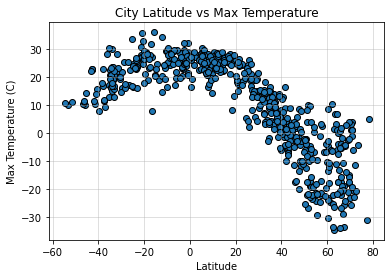

In [81]:
# Build scatter plot for latitude vs. temperature
LatvTemp = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# plt.ylim(min(city_data_df["Max Temp"], max(city_data_df["Max Temp"]+10))
# plt.ylim(-20, max(city_data_df["Max Temp"]+10))
# plt.ylim(-20,40)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(alpha=0.5)

# plt.figure(figsize=(20,25))

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

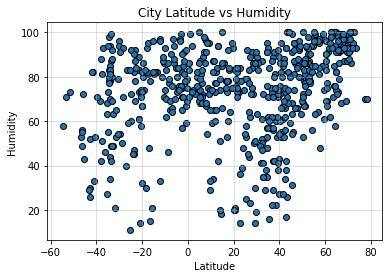

In [82]:
# Build the scatter plots for latitude vs. humidity
LatvHumidity = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(alpha=0.5)

# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

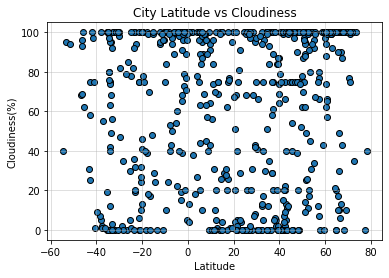

In [83]:
# Build the scatter plots for latitude vs. cloudiness
LatvCoud = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(alpha=0.5)

# Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

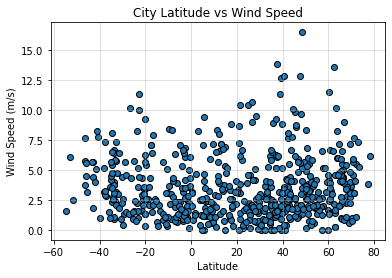

In [84]:
# Build the scatter plots for latitude vs. wind speed
LatvWind = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(alpha=0.5)

# plt.figure(figsize=(20,20))

# Save the figure
# plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


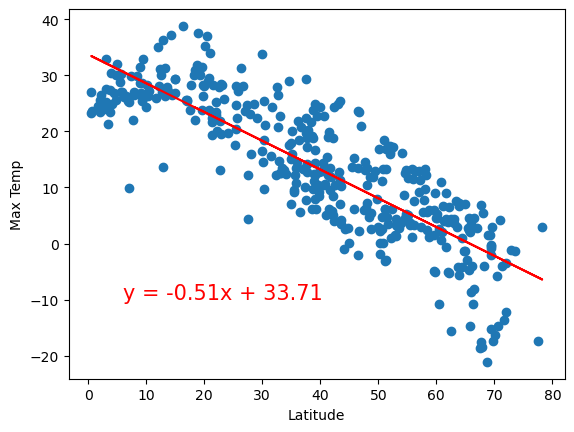

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


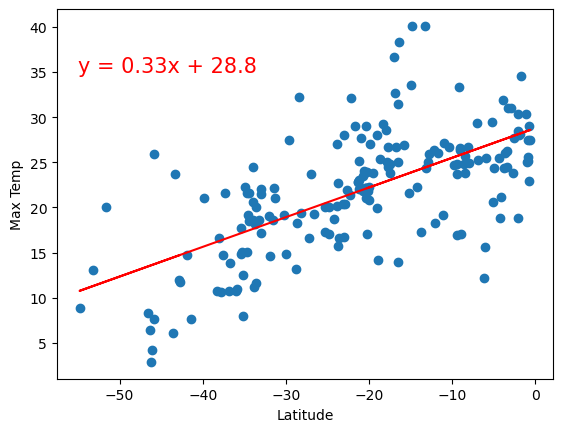

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


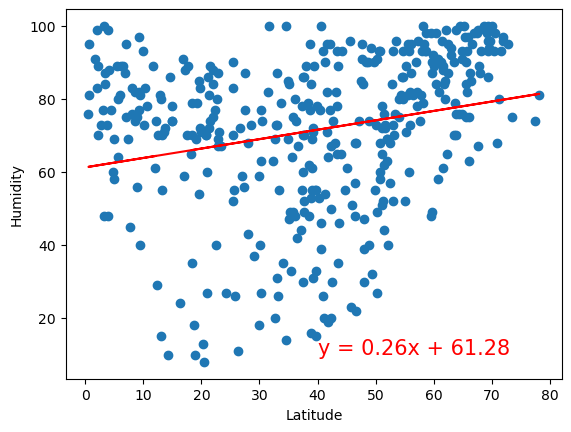

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


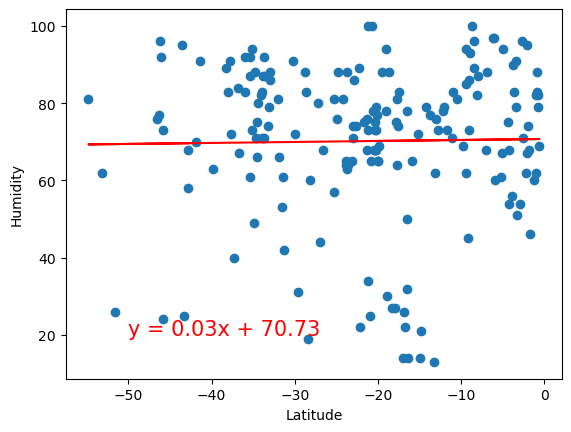

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


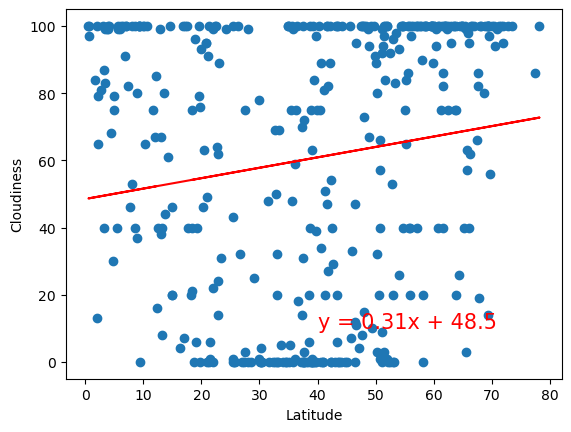

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


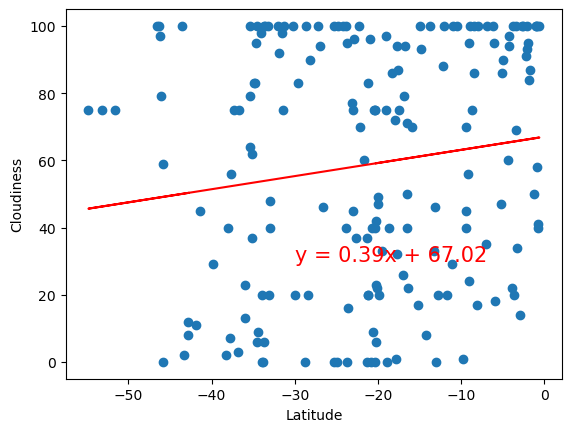

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


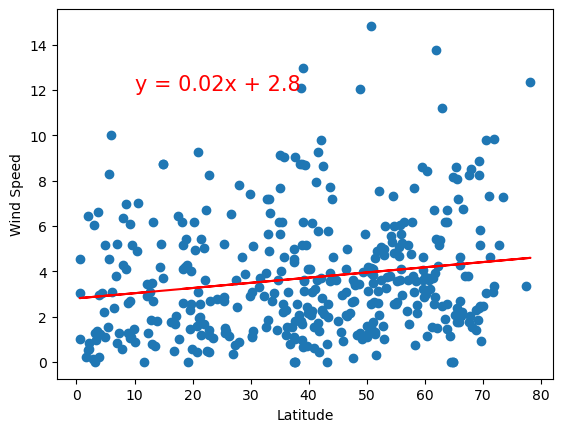

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


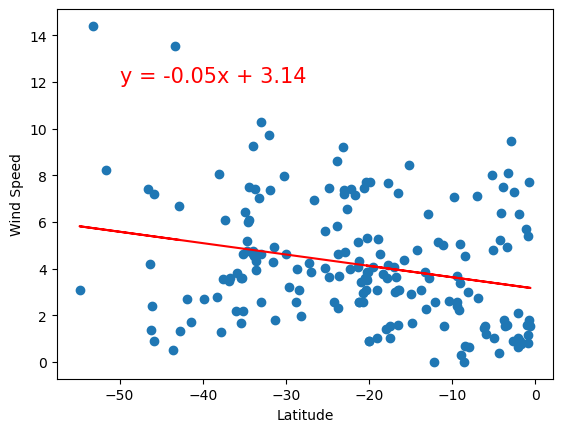

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE